# Sistem Rekomendasi Musik

- **Nama:** Nabila Alawiyah
- **Email:** nabilaalawiyah.25@gmail.com
- **ID Dicoding:** nabilaalawiyah

# Project Overview


Musik digital kini menjadi media utama konsumsi hiburan global melalui platform streaming seperti Spotify, yang mendominasi distribusi dan akses musik. Popularitas lagu di platform ini sangat menentukan kesuksesan komersial artis dan industri musik secara keseluruhan.

Faktor yang memengaruhi popularitas tidak hanya berasal dari preferensi pendengar, tetapi juga terkait dengan karakteristik audio lagu seperti tempo, loudness, dan valence, yang memengaruhi respon emosional pendengar (Celma & Herrera, 2008). Selain itu, algoritma rekomendasi yang diterapkan platform berperan besar dalam meningkatkan visibilitas lagu (Schedl, 2017).

Dataset Spotify yang berisi fitur akustik dan data popularitas lagu dari berbagai negara memberikan kesempatan untuk menganalisis hubungan antara atribut lagu dan tingkat kepopulerannya, sehingga membantu strategi produksi dan pemasaran musik yang lebih efektif.

# Business Understanding

## Problem Statements

Rumusan masalah dari masalah latar belakang diatas adalah:
1. Siapa saja top 10 penyanyi di Indonesia?
2. Faktor apa saja yang memengaruhi popularitas lagu?
2. Bagaimana cara membuat sistem rekomendasi terbaik yang dapat diimplementasikan?

## Goals

Berdasarkan problem statements, berikut tujuan yang ingin dicapai pada proyek ini.
1. Mengetahui siapa saja top 10 penyanyi di Indonesia?
2. Mengetahui faktor apa saja yang memengaruhi popularitas lagu
3. Mengetahui cara membuat sistem rekomendasi terbaik yang dapat diimplementasikan.


## Solution Approach

Untuk mencapai goals tersebut, solution statements yang diusulkan adalah:
1. Melakukan analisis dengan memfilter data berdasarkan negara Indonesia. Artis diekstrak dari kolom artists dan dipisah per individu, kemudian dihitung rata-rata popularitas serta jumlah lagu Top 50 untuk masing-masing artis. Selanjutnya, dibuat skor gabungan dari kedua metrik tersebut, dan diambil 10 artis dengan skor tertinggi.
2. Menganalisis hubungan antar fitur untuk mengukur kekuatan kontribusi tiap faktor terhadap popularitas lagu, sehingga faktor-faktor utama yang paling berpengaruh dapat diidentifikasi.
3. Menggunakan algoritma cosine similarity untuk membangun sistem rekomendasi, kemudian mengevaluasi performanya guna menjamin keakuratan sistem rekomendasi tersebut.

# Data Understanding

Tahap ini merupakan proses analisis data yang bertujuan untuk memperoleh pemahaman yang menyeluruh mengenai dataset sebelum melanjutkan ke tahap analisis lebih lanjut.

## 1. Mengimport Library


Pada bagian ini kita mengimport seluruh library yang diperlukan untuk menganalisis

In [407]:
!pip install kaggle

In [408]:
!pip install keras

In [409]:
import os
import shutil
import zipfile
import textwrap
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report

## Data Loading

Tahap untuk memuat dataset yang akan digunakan agar dataset lebih mudah dipahami. Pada project kali ini, menggunakan dataset yang berasal dari Kaggle. [Link Dataset](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)

In [410]:
#!/bin/bash
!curl -L -o top-song.zip\
  "https://www.kaggle.com/api/v1/datasets/download/asaniczka/top-spotify-songs-in-73-countries-daily-updated"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  157M  100  157M    0     0  65.3M      0  0:00:02  0:00:02 --:--:-- 99.5M


In [411]:
#membuka zip menjadi folder
with zipfile.ZipFile("/content/top-song.zip", "r") as zip_ref:
    zip_ref.extractall("top-song")

#membaca csv dalam folder
data = pd.read_csv("/content/top-song/universal_top_spotify_songs.csv")

# Display the first few rows
data

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,1,1,0,NaN,2025-05-27,94,False,...,2,-6.141,1,0.0600,0.704000,0.000007,0.0550,0.391,168.115,3
1,27xkOIER6uDLKALIelHylZ,Don’t Say You Love Me,Jin,2,-1,30,NaN,2025-05-27,89,False,...,8,-5.490,1,0.0304,0.484000,0.000000,0.1050,0.757,111.976,4
2,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",3,0,-1,NaN,2025-05-27,91,False,...,6,-7.727,0,0.0317,0.289000,0.000000,0.1260,0.498,157.964,3
3,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,4,0,-1,NaN,2025-05-27,100,False,...,2,-10.171,1,0.0358,0.200000,0.060800,0.1170,0.438,104.978,4
4,0FTmksd2dxiE5e3rWyJXs6,back to friends,sombr,5,0,-1,NaN,2025-05-27,96,False,...,1,-2.291,1,0.0301,0.000094,0.000088,0.0929,0.235,92.855,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2056311,0AYt6NMyyLd0rLuvr0UkMH,Slime You Out (feat. SZA),"Drake, SZA",46,4,0,AE,2023-10-18,84,True,...,5,-9.243,0,0.0502,0.508000,0.000000,0.2590,0.105,88.880,3
2056312,2Gk6fi0dqt91NKvlzGsmm7,SAY MY GRACE (feat. Travis Scott),"Offset, Travis Scott",47,3,0,AE,2023-10-18,80,True,...,10,-5.060,1,0.0452,0.058500,0.000000,0.1320,0.476,121.879,4
2056313,26b3oVLrRUaaybJulow9kz,People,Libianca,48,2,0,AE,2023-10-18,88,False,...,10,-7.621,0,0.0678,0.551000,0.000013,0.1020,0.693,124.357,5
2056314,5ydjxBSUIDn26MFzU3asP4,Rainy Days,V,49,1,0,AE,2023-10-18,88,False,...,9,-8.016,0,0.0875,0.739000,0.000000,0.1480,0.282,74.828,4


In [412]:
data.shape

(2056316, 25)

**Insight:**
* Dataset ini terdiri atas 2.049.119 baris dan 25 kolom.
* Karena data terlalu banyak, untuk mencegah RAM penuh maka saya hanya menggunakan 5000 data saja.

In [413]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056316 entries, 0 to 2056315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

**Insight:**
- Terdapat 7 kolom yang bertipe data object, 8 kolom bertipe data int64, 9 kolom bertipe data float64, dan 1 kolom bertipe data boolean.

### Deskripsi variable

Berikut adalah arti dari variabel-variabel pada data tersebut:

| Variabel           | Tipe Data | Keterangan                                                                 |
|--------------------|-----------|---------------------------------------------------------------------------|
| `spotify_id`       | object    | ID unik untuk lagu dalam database Spotify.                                |
| `name`             | object    | Judul lagu.                                                               |
| `artists`          | object    | Nama artis yang membawakan lagu. |
| `daily_rank`       | integer   | Peringkat harian lagu di daftar Top 50.                                  |
| `daily_movement`   | integer   | Perubahan peringkat dibandingkan dengan hari sebelumnya.                 |
| `weekly_movement`  | integer   | Perubahan peringkat dibandingkan dengan minggu sebelumnya.               |
| `country`          | object    | Kode ISO negara asal playlist Top 50. Jika bernilai Null, berarti berasal dari playlist Global Top 50. |
| `snapshot_date`    | object    | Tanggal pengambilan data dari API Spotify.                               |
| `popularity`       | integer   | Skor popularitas lagu di Spotify saat ini (0–100).                       |
| `is_explicit`      | bool      | Menunjukkan apakah lagu mengandung lirik eksplisit (TRUE or FALSE).  |
| `duration_ms`      | integer   | Durasi lagu dalam satuan milidetik.                                      |
| `album_name`       | object    | Nama album tempat lagu tersebut dirilis.                                 |
| `album_release_date` | object  | Tanggal rilis album.                                                     |
| `danceability`     | float     | Seberapa cocok lagu untuk menari (0.0 – 1.0).                            |
| `energy`           | float     | Tingkat intensitas dan aktivitas lagu (0.0 – 1.0).                       |
| `key`              | integer   | Kunci musikal lagu, direpresentasikan sebagai angka 0–11.                |
| `loudness`         | float     | Tingkat volume rata-rata lagu dalam desibel (bernilai negatif).|
| `mode`             | integer   | Modus lagu: 1 untuk mayor, 0 untuk minor.                                |
| `speechiness`      | float     | Indikator seberapa banyak kata-kata yang terdapat dalam lagu.           |
| `acousticness`     | float     | Kemungkinan bahwa lagu bersifat akustik (0.0 – 1.0).                     |
| `instrumentalness` | float     | Perkiraan seberapa besar lagu bersifat instrumental (tanpa vokal).      |
| `liveness`         | float     | Estimasi apakah lagu direkam secara live (0.0 – 1.0).                    |
| `valence`          | float     | Menggambarkan mood lagu: bahagia (1.0) hingga sedih (0.0).               |
| `tempo`            | float     | Kecepatan lagu dalam satuan BPM (beats per minute).                      |
| `time_signature`   | integer   | Birama lagu, misalnya 4 untuk 4/4.                                       |


### Deskripsi Statistik dari Data

In [414]:
# Membuat df
df_filtered = pd.DataFrame(data)

In [415]:
# Memanggil untuk statistik data mengecek outlier.
df_filtered.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06
mean,2.549284e+01,9.292263e-01,2.960283e+00,7.589601e+01,1.942527e+05,6.762976e-01,6.486258e-01,5.531805e+00,-6.759242e+00,5.369987e-01,9.548064e-02,2.747450e-01,2.290514e-02,1.705620e-01,5.465119e-01,1.221156e+02,3.900467e+00
std,1.442896e+01,7.022959e+00,1.234810e+01,1.578211e+01,4.984127e+04,1.437342e-01,1.687985e-01,3.593002e+00,3.829492e+00,4.986293e-01,9.143583e-02,2.509173e-01,1.129000e-01,1.246540e-01,2.311345e-01,2.784988e+01,4.046627e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.626370e+05,5.800000e-01,5.510000e-01,2.000000e+00,-7.829000e+00,0.000000e+00,3.840000e-02,6.670000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,7.900000e+01,1.861910e+05,7.000000e-01,6.680000e-01,6.000000e+00,-6.056000e+00,1.000000e+00,5.810000e-02,1.910000e-01,1.330000e-06,1.210000e-01,5.480000e-01,1.199650e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.187010e+05,7.800000e-01,7.670000e-01,9.000000e+00,-4.723000e+00,1.000000e+00,1.120000e-01,4.370000e-01,9.950000e-05,2.040000e-01,7.330000e-01,1.400350e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,1.114155e+06,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.570000e-01,9.960000e-01,9.950000e-01,9.830000e-01,9.920000e-01,2.360890e+02,5.000000e+00


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

| Kolom                                      | Insight                                                                                                                                                                                                               |
| ------------------------------------------ | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **daily\_rank**                            | Nilai minimum 1 dan maksimum 50 menunjukkan ini adalah data dari daftar **Top 50** lagu harian. Rata-rata ranking adalah 25, artinya distribusinya cukup merata.                                                      |
| **daily\_movement** & **weekly\_movement** | Nilai minimum -49 dan maksimum 49 menunjukkan perubahan peringkat cukup dinamis. Rata-rata perubahan harian positif (+0.93), menandakan kecenderungan naik. Namun, standar deviasi tinggi menandakan fluktuasi besar. |
| **popularity**                             | Rata-rata sekitar 75.89 dari maksimum 100, menunjukkan bahwa lagu-lagu di dataset ini memang **sangat populer**.                                                                                                      |
| **duration\_ms**                           | Rata-rata durasi lagu sekitar 194 detik (\~3 menit 14 detik), yang umum untuk lagu pop.                                                                                                                               |
| **danceability**                           | Rata-rata 0.68 menunjukkan lagu-lagu ini **cukup enak untuk berdansa**.                                                                                                                                               |
| **energy**                                 | Rata-rata 0.84 artinya lagu-lagu cenderung memiliki **energi tinggi** (bersemangat, cepat).                                                                                                                           |
| **key**                                    | Rata-rata di sekitar 5.53 (dalam skala 0–11). Karena ini kategorikal, tidak terlalu bermakna secara statistik.                                                                                                        |
| **loudness**                               | Rata-rata sekitar -7.85 dB, masih dalam rentang normal lagu-lagu mainstream (biasanya antara -5 hingga -12 dB).                                                                                                       |
| **mode**                                   | Rata-rata 0.37 artinya **mayoritas lagu berada di mode minor**, yang sering diasosiasikan dengan suasana mellow/gelap.                                                                                                |
| **speechiness**                            | Rata-rata 0.09 menunjukkan **kebanyakan lagu memiliki sedikit spoken words**, seperti dalam lagu rap.                                                                                                                 |
| **acousticness**                           | Rata-rata 0.27 menunjukkan lagu-lagu ini tidak terlalu akustik, lebih banyak elemen elektronik/produksi.                                                                                                              |
| **instrumentalness**                       | Nilai rata-rata hanya 0.02 menandakan **hampir semua lagu memiliki vokal**.                                                                                                                                           |
| **liveness**                               | Rata-rata 0.17 artinya kebanyakan lagu adalah rekaman studio, bukan live performance.                                                                                                                                 |
| **valence**                                | Rata-rata 0.58 berarti lagu-lagu cenderung ke suasana **positif atau bahagia**, tetapi tetap seimbang.                                                                                                                |
| **tempo**                                  | Rata-rata 121 BPM – kecepatan ini umum untuk genre pop dan dance.                                                                                                                                                     |
| **time\_signature**                        | Rata-rata mendekati 4 artinya **mayoritas lagu memakai birama 4/4**, yang paling umum dalam musik populer.                                                                                                            |


## Exploratory Data Analysis

### Analysis Popularitas Berdasarkan Variable is_explicit

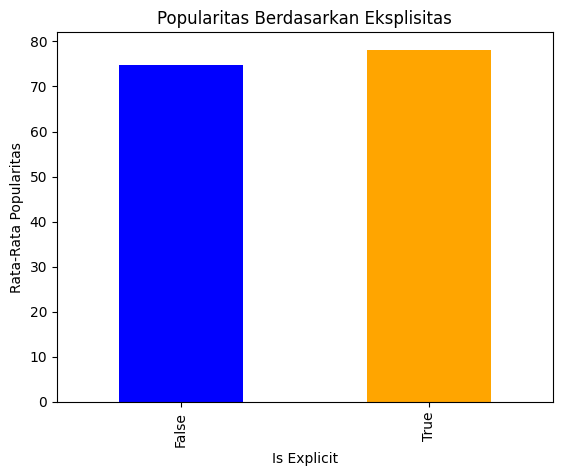

In [416]:
# Calculating Average Popularity Based on Explicitness
explicitness_popularity = df_filtered.groupby('is_explicit')['popularity'].mean()

# Visualizing Popularity Based on Explicitness
explicitness_popularity.plot(kind='bar', color=['blue', 'orange'])
plt.title("Popularitas Berdasarkan Eksplisitas")
plt.xlabel("Is Explicit")
plt.ylabel("Rata-Rata Popularitas")
plt.show()

**Insight:**
* Grafik ini membandingkan rata-rata popularitas lagu eksplisit dan non-eksplisit. Lagu eksplisit sedikit lebih populer, tapi perbedaannya tidak signifikan, menunjukkan label eksplisit tidak berpengaruh besar pada popularitas lagu.


### Analysis Popularitas Berdasarkan Negara asal playlist Top 50

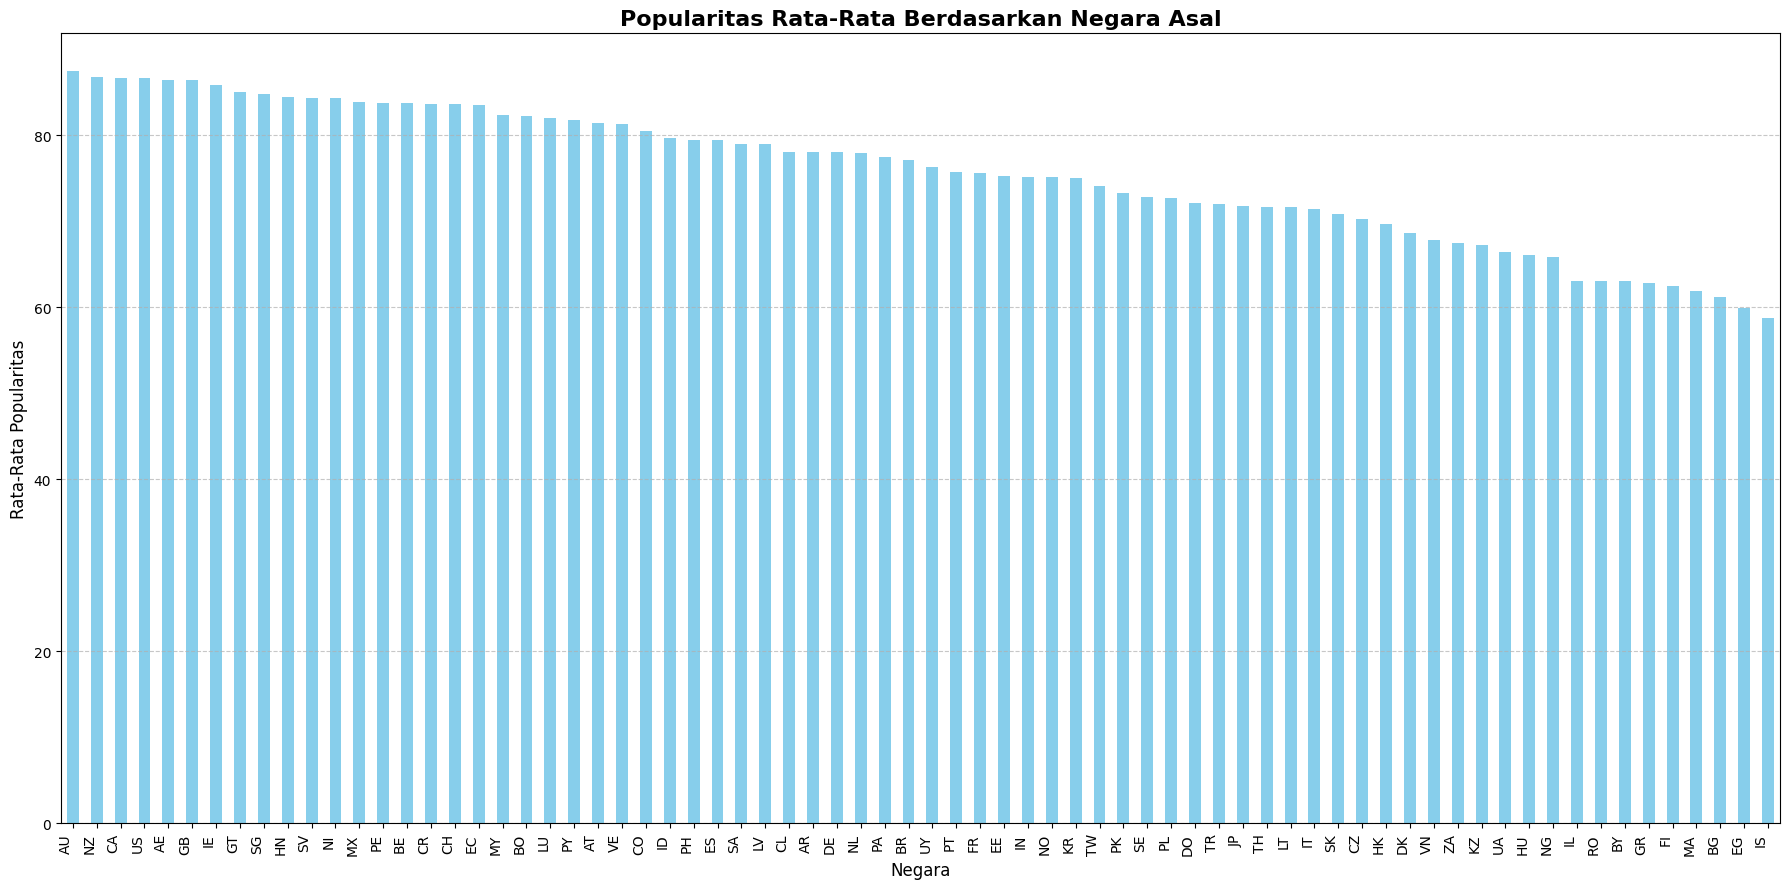

In [417]:
# Menghitung Rata-Rata Popularitas Berdasarkan Negara
country_popularity = df_filtered.groupby('country')['popularity'].mean().sort_values(ascending=False)

# Membuat Plot
plt.figure(figsize=(18, 9))
country_popularity.plot(kind='bar', color='skyblue')
plt.xticks(rotation=90, ha='right')
plt.title("Popularitas Rata-Rata Berdasarkan Negara Asal", fontsize=16, fontweight='bold')
plt.xlabel("Negara", fontsize=12)
plt.ylabel("Rata-Rata Popularitas", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**Insight:**
* Top tiga negara dengan popularitas tertinggi adalah Australia (AU), New Zealand (NZ), dan Canada (CA)
* Top tiga negara dengan popilaritas terendah adalah Islandia (IS), Egypt (EG), dan Bulgaria (BG)

### Analysis Hubungan Popularitas Berdasarkan Fitur Lagu

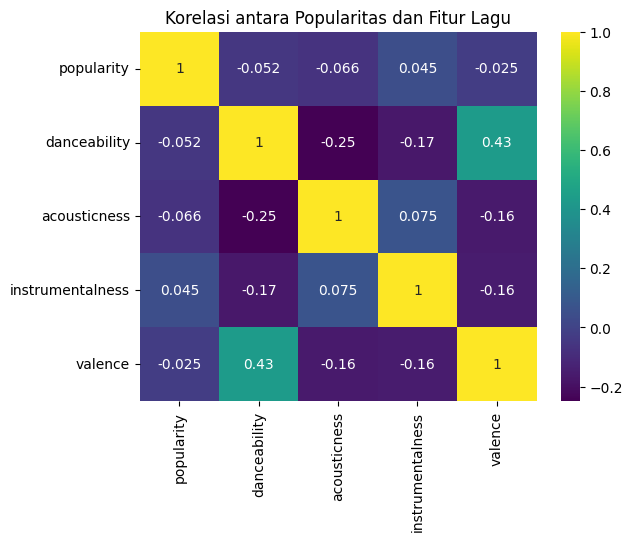

In [418]:
# Menghitung Korelasi antara Popularitas dan Fitur Akustik
korelasi_fitur = df_filtered[['popularity', 'danceability', 'acousticness', 'instrumentalness', 'valence']].corr()

# Visualisasi Korelasi Fitur dengan Heatmap
sns.heatmap(korelasi_fitur, annot=True, cmap='viridis')
plt.title("Korelasi antara Popularitas dan Fitur Lagu")
plt.show()

**Insight:**
1. Hasil korelasi menunjukkan bahwa tidak ada hubungan yang kuat antara popularitas dan fitur-fitur tersebut, karena nilai korelasinya sangat rendah.
2. Terdapat korelasi positif yang cukup kuat (0.43) antara danceability dan valence, yang berarti bahwa lagu yang enak untuk berdansa biasanya juga terasa lebih ceria atau menyenangkan. Sebaliknya, fitur acousticness berkorelasi negatif dengan danceability (-0.25) dan valence (-0.16), menunjukkan bahwa lagu yang lebih akustik cenderung terdengar lebih tenang dan kurang cocok untuk berdansa.

**Kesimpulan:**

Fitur-fitur seperti danceability, acousticness, dan instrumentalness memang saling berhubungan, tetapi tidak berpengaruh besar terhadap popularitas lagu.

### Top 10 Artist di Indonesia

        artists  avg_popularity  song_count  final_score
0      Bernadya       78.149455        1559   522.404618
1   Juicy Luicy       75.666428        1394   471.166499
2        Hindia       77.929042        1367   464.650329
3    Feby Putri       78.525199        1131   394.267639
4         Tulus       77.448065         982   348.813646
5        Lyodra       79.177610         929   334.124327
6      Mahalini       77.491031         892   321.843722
7   For Revenge       76.549601         877   316.684721
8  Tiara Andini       77.121981         828   302.385386
9  Nadin Amizah       75.548348         817   297.983843



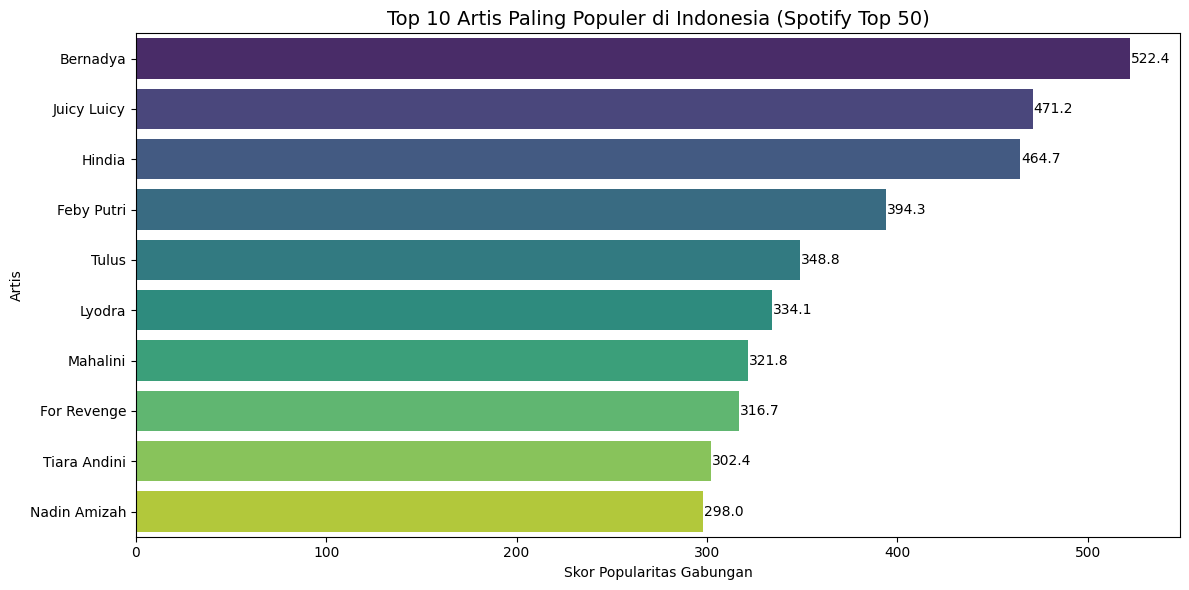

In [419]:
# 1. Filter data Indonesia dan copy
df_id = df_filtered[df_filtered['country'] == 'ID'].copy()

# 2. Bersihkan kolom 'artists' dan pisahkan jadi list
df_id.loc[:, 'artists'] = df_id['artists'].str.strip("[]").str.replace("'", "", regex=False).str.split(", ")

# 3. Ubah jadi satu artis per baris
df_exploded = df_id.explode('artists')

# 4. Hitung rata-rata popularitas dan jumlah lagu
artist_group = df_exploded.groupby('artists').agg({
    'popularity': 'mean',
    'name': 'count'
}).rename(columns={
    'popularity': 'avg_popularity',
    'name': 'song_count'
})

# 5. Hitung skor gabungan
artist_group['final_score'] = artist_group['avg_popularity'] * 0.7 + artist_group['song_count'] * 0.3

# 6. Ambil 10 artis teratas
top_10_artists = artist_group.sort_values('final_score', ascending=False).head(10).reset_index()
# Tampilkan hasilnya
print(top_10_artists)
print()

# 7. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_artists,
    x='final_score',
    y='artists',
    hue='artists',
    palette='viridis',
    dodge=False,
    legend=False
)

# Tambah label nilai di ujung bar
for i, row in top_10_artists.iterrows():
    plt.text(row['final_score'] + 0.5, i, f"{row['final_score']:.1f}", va='center')

# Judul dan label
plt.title('Top 10 Artis Paling Populer di Indonesia (Spotify Top 50)', fontsize=14)
plt.xlabel('Skor Popularitas Gabungan')
plt.ylabel('Artis')
plt.tight_layout()
plt.show()

**Insight:**
* Bernadya jadi artis paling populer di Spotify Indonesia (skor: 521.5) berkat kombinasi popularitas tinggi dan jumlah lagu terbanyak (1556 lagu).
* Juicy Luicy dan Hindia menyusul di posisi 2 dan 3, menunjukkan konsistensi rilisan dan basis pendengar yang kuat.
* Lyodra dan Feby Putri punya popularitas rata-rata tertinggi (79.17 & 78.51) meski jumlah lagu lebih sedikit. Menandakan kualitas lagu yang tinggi.
* Tulus tetap masuk top 5 meskipun produktivitasnya lebih rendah dari yang lain. Menunjukkan lagu-lagunya tahan lama dan terus diputar.

## Data Quality Verification

### Memeriksa Kesesuaian tipe data dan Menentukan prioritas kolom

In [420]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056316 entries, 0 to 2056315
Data columns (total 25 columns):
 #   Column              Dtype  
---  ------              -----  
 0   spotify_id          object 
 1   name                object 
 2   artists             object 
 3   daily_rank          int64  
 4   daily_movement      int64  
 5   weekly_movement     int64  
 6   country             object 
 7   snapshot_date       object 
 8   popularity          int64  
 9   is_explicit         bool   
 10  duration_ms         int64  
 11  album_name          object 
 12  album_release_date  object 
 13  danceability        float64
 14  energy              float64
 15  key                 int64  
 16  loudness            float64
 17  mode                int64  
 18  speechiness         float64
 19  acousticness        float64
 20  instrumentalness    float64
 21  liveness            float64
 22  valence             float64
 23  tempo               float64
 24  time_signature      int6

**Insight:**
* Untuk melakukan content-based filtering, dapat dilakukan penghapusan beberapa kolom yaitu: daily_rank, daily_movement, weekly_movement, country, snapshot_date, album_name, album_release_date, key, mode, time_signature.
* Melakukan konversi pada kolom duration_ms ke menit.
* Kolom loudness bernilai negatif, sehingga perlu dilakukan standarisasi
* Kolom is_explicit diubah ke dalam numerik (TRUE : 1, dan FALSE : 0)
* Perlu dilakukan standarisasi pada numerical feature

### Memeriksa Data duplikat

In [421]:
df_filtered.duplicated().sum()

np.int64(0)

**Insight:**
1. Tidak ada data yang duplikat

### Memeriksa Data Missing Value

In [422]:
df_filtered.isnull().sum()

,0
spotify_id,0
name,30
artists,29
daily_rank,0
daily_movement,0
weekly_movement,0
country,28158
snapshot_date,0
popularity,0
is_explicit,0


**Insight:**
* Kolom country memiliki banyak nilai null (28.058), yang berarti sebagian besar data berasal dari playlist Global Top 50.
* Kolom name dan artists memiliki sedikit nilai null (sekitar 29-30), yang harus diperhatikan karena penting untuk analisis lagu dan artis.
* Kolom album_name dan album_release_date juga memiliki cukup banyak nilai null (822 dan 659), bisa jadi karena beberapa lagu belum ada data album lengkapnya.
* Sebagian besar kolom fitur audio dan metadata lainnya tidak memiliki nilai null, jadi data cukup lengkap di aspek teknis.

### Memeriksa Data Outlier

In [423]:
# Melakukan analisis statistik data setelah dihapus data duplikat dan missing value.
df_filtered.describe()

,daily_rank,daily_movement,weekly_movement,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06,2.056316e+06
mean,2.549284e+01,9.292263e-01,2.960283e+00,7.589601e+01,1.942527e+05,6.762976e-01,6.486258e-01,5.531805e+00,-6.759242e+00,5.369987e-01,9.548064e-02,2.747450e-01,2.290514e-02,1.705620e-01,5.465119e-01,1.221156e+02,3.900467e+00
std,1.442896e+01,7.022959e+00,1.234810e+01,1.578211e+01,4.984127e+04,1.437342e-01,1.687985e-01,3.593002e+00,3.829492e+00,4.986293e-01,9.143583e-02,2.509173e-01,1.129000e-01,1.246540e-01,2.311345e-01,2.784988e+01,4.046627e-01
min,1.000000e+00,-4.900000e+01,-4.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,2.010000e-05,0.000000e+00,-5.434100e+01,0.000000e+00,0.000000e+00,3.450000e-06,0.000000e+00,1.390000e-02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.300000e+01,-1.000000e+00,-3.000000e+00,6.500000e+01,1.626370e+05,5.800000e-01,5.510000e-01,2.000000e+00,-7.829000e+00,0.000000e+00,3.840000e-02,6.670000e-02,0.000000e+00,9.610000e-02,3.700000e-01,1.000190e+02,4.000000e+00
50%,2.500000e+01,0.000000e+00,0.000000e+00,7.900000e+01,1.861910e+05,7.000000e-01,6.680000e-01,6.000000e+00,-6.056000e+00,1.000000e+00,5.810000e-02,1.910000e-01,1.330000e-06,1.210000e-01,5.480000e-01,1.199650e+02,4.000000e+00
75%,3.800000e+01,2.000000e+00,5.000000e+00,8.800000e+01,2.187010e+05,7.800000e-01,7.670000e-01,9.000000e+00,-4.723000e+00,1.000000e+00,1.120000e-01,4.370000e-01,9.950000e-05,2.040000e-01,7.330000e-01,1.400350e+02,4.000000e+00
max,5.000000e+01,4.900000e+01,4.900000e+01,1.000000e+02,1.114155e+06,9.880000e-01,9.980000e-01,1.100000e+01,3.233000e+00,1.000000e+00,9.570000e-01,9.960000e-01,9.950000e-01,9.830000e-01,9.920000e-01,2.360890e+02,5.000000e+00


Fungsi `describe()` memberikan informasi statistik pada masing-masing kolom, antara lain:

- `Count` adalah jumlah sampel pada data.
- `Mean` adalah nilai rata-rata.
- `Std` adalah standar deviasi.
- `Min` yaitu nilai minimum setiap kolom.
- `25%` adalah kuartil pertama. Kuartil adalah nilai yang menandai batas interval dalam empat bagian sebaran yang sama.
- `50%` adalah kuartil kedua, atau biasa juga disebut median (nilai tengah).
-` 75%` adalah kuartil ketiga.
- `Max` adalah nilai maksimum.

In [424]:
# Fitur numerikal (tipe angka)
numerical_feature = [
    'daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

# Fitur kategorikal (tipe objek/kategori)
categorical_feature = [
    'spotify_id', 'name', 'artists', 'country', 'album_name',
    'album_release_date', 'snapshot_date', 'is_explicit'
]

In [425]:
#Cek data outlier
numerical_feature = [
    'daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo'
]

# Ensure 'data' is the correct DataFrame variable
selected_cols = data[numerical_feature] # Changed from df_filtered to data

Q1 = selected_cols.quantile(0.25)
Q3 = selected_cols.quantile(0.75)
IQR = Q3 - Q1

# Correctly filter the DataFrame 'data' and assign to df_cleaned
outlier_condition = ~((selected_cols < (Q1 - 1.5 * IQR)) | (selected_cols > (Q3 + 1.5 * IQR))).any(axis=1)
# Apply the filter to the original 'data' DataFrame
df_cleaned = data[outlier_condition].copy() # Changed from df_filtered to data and added .copy()

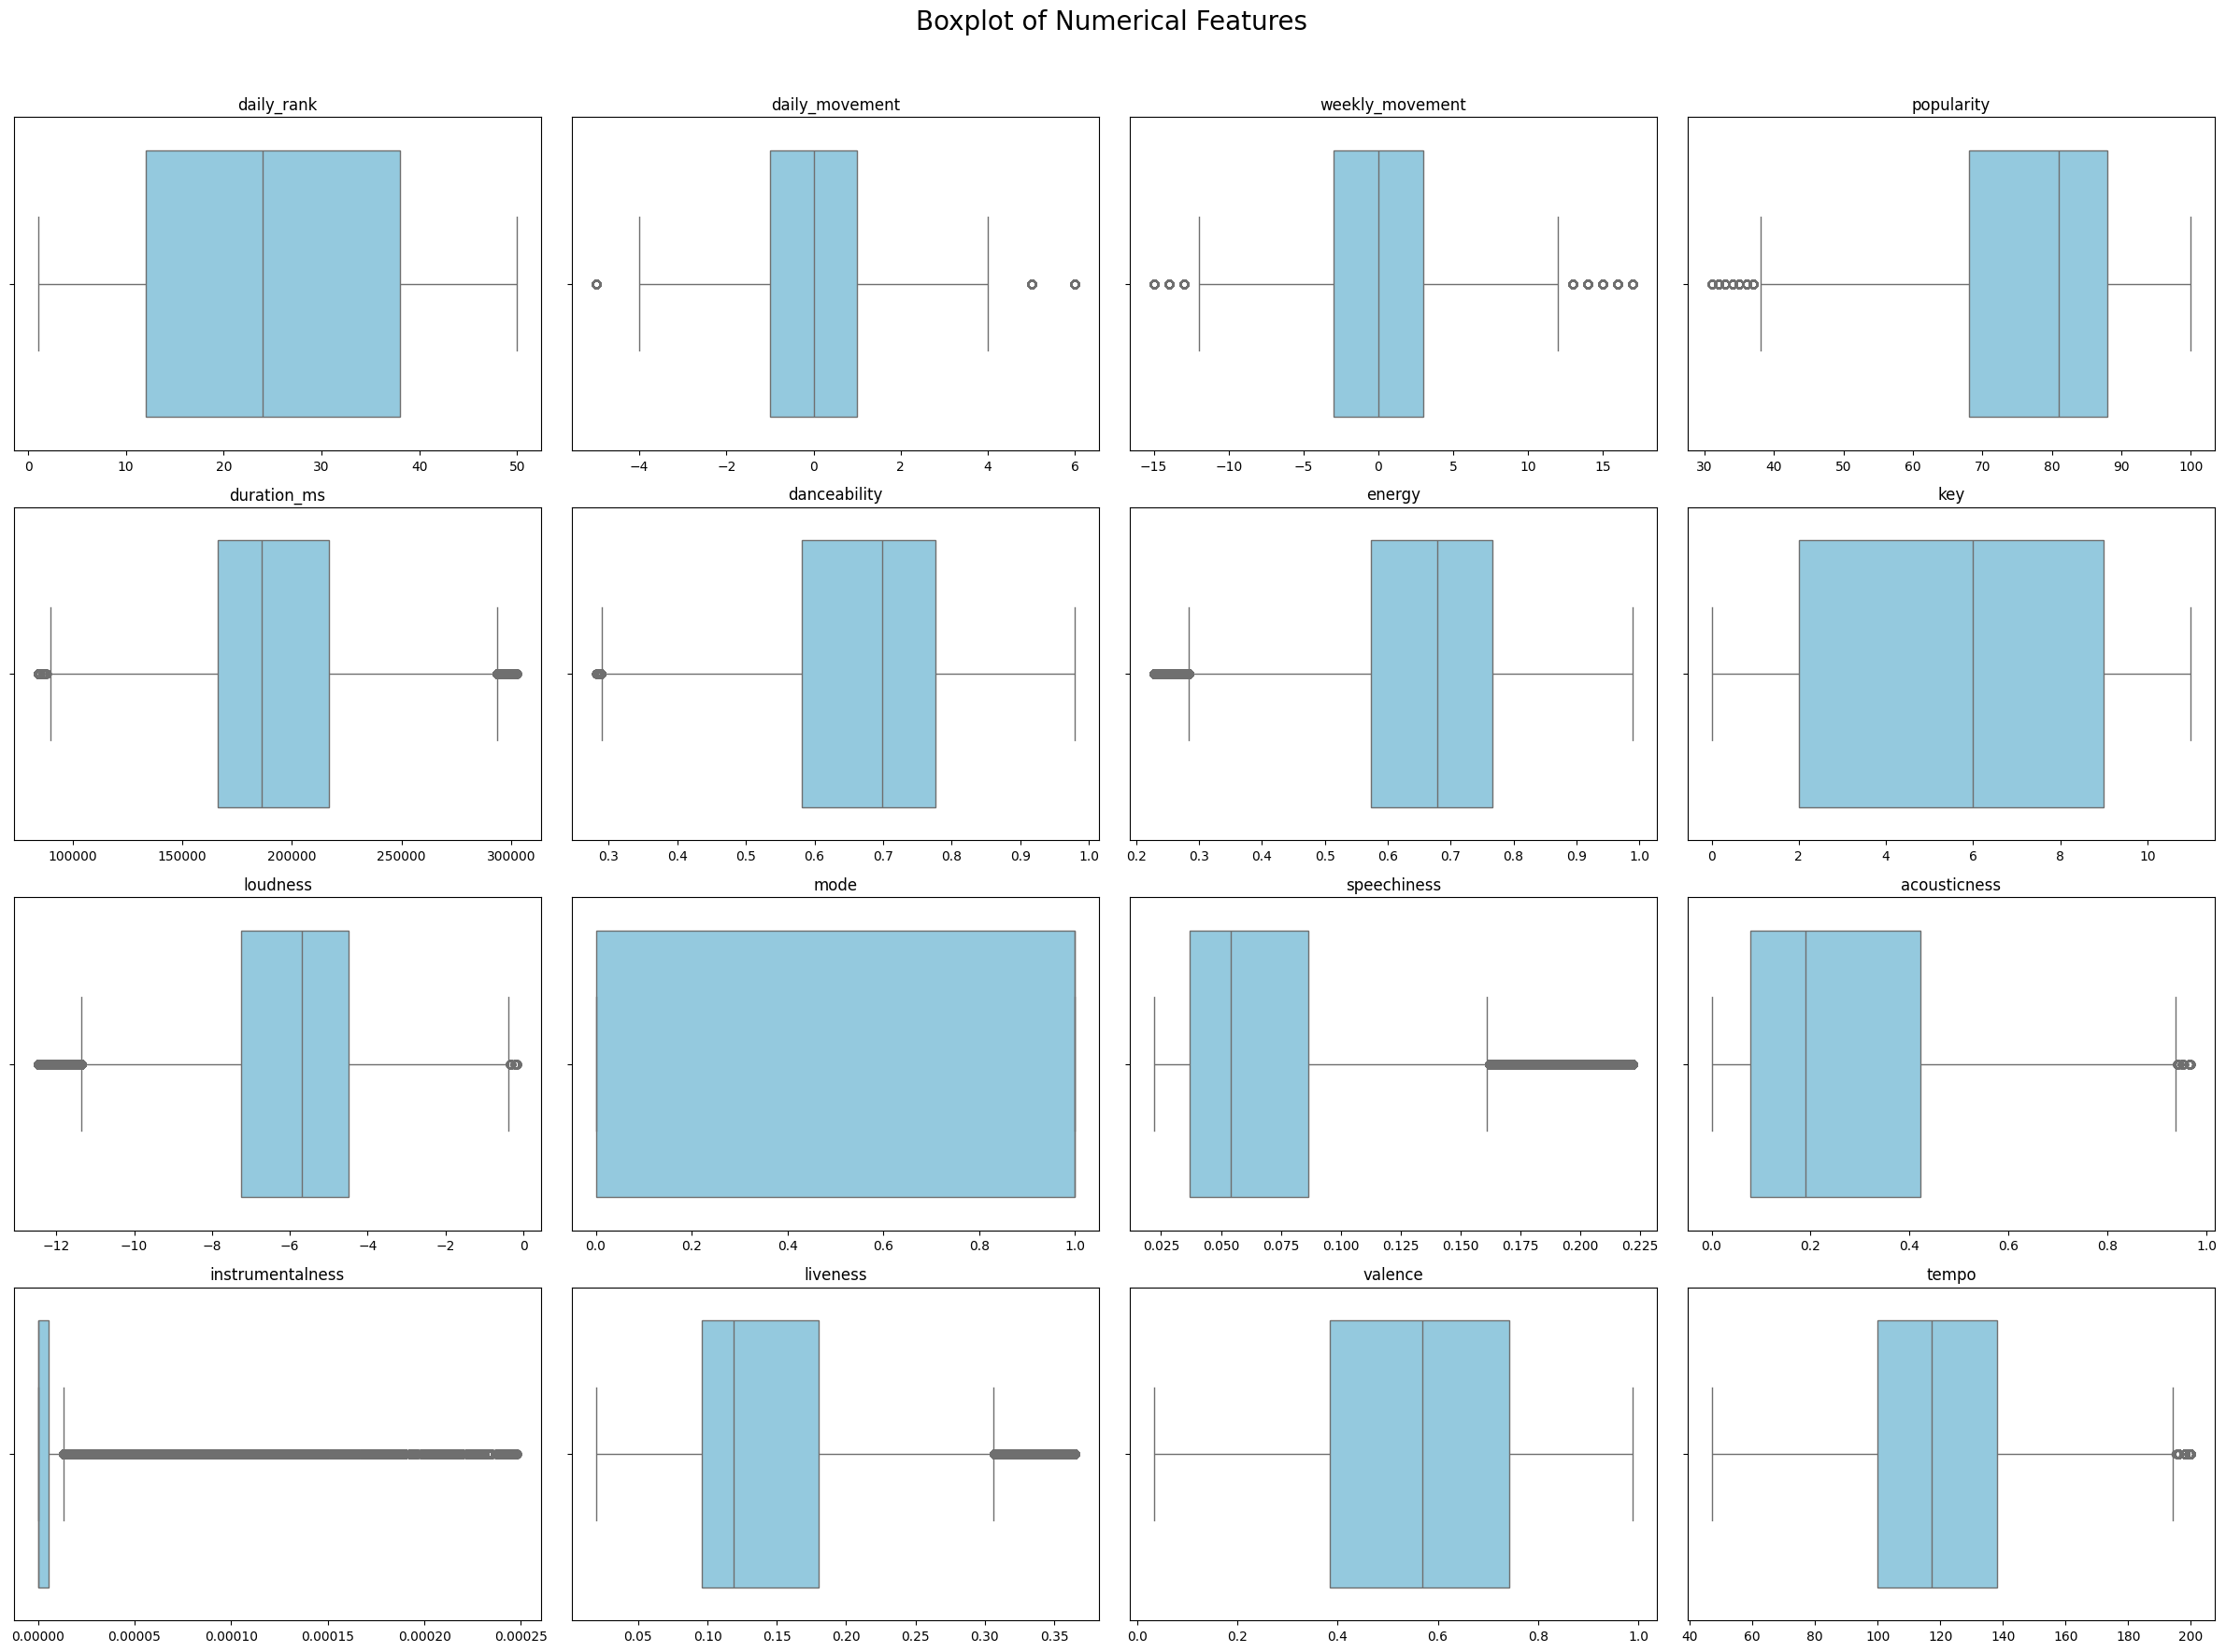

In [426]:
# Buat grid 4 baris x 4 kolom (untuk 17 fitur numerikal)
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 18))
fig.suptitle('Boxplot of Numerical Features', fontsize=20)

# Flatten axes supaya bisa diloop
axes = axes.flatten()

# Plot masing-masing fitur
for i, feature in enumerate(numerical_feature):
    sns.boxplot(data=df_cleaned, x=feature, ax=axes[i], color='skyblue')
    axes[i].set_title(f'{feature}', fontsize=12)
    axes[i].set_xlabel('')

# Hapus sisa subplot kosong (jika ada)
for j in range(len(numerical_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Hindari overlap dengan judul
plt.show()


**Interpretasi Boxplot:**

1. Daily Rank & Popularity.
   
   Sebagian besar lagu memiliki ranking harian dan tingkat popularitas yang cukup merata. Tidak terdapat outlier yang signifikan pada kedua kolom ini.

2. Daily Movement & Weekly Movement.
   
   Nilai perpindahan peringkat harian dan mingguan sebagian besar berada di sekitar nol, namun terdapat beberapa outlier yang menandakan lagu dengan perubahan peringkat yang sangat drastis.

3. Duration (duration\_ms).
   
   Durasi lagu umumnya berada antara 150.000 hingga 250.000 milidetik (2,5–4 menit), dengan beberapa outlier berdurasi sangat pendek maupun panjang.

4. Danceability, Energy, & Valence.
   
   Sebagian besar lagu memiliki nilai danceability, energy, dan valence yang tinggi (di atas 0.5), menandakan lagu-lagu cenderung mudah dinikmati, enerjik, dan ceria.

5. Key & Mode.
   
   Penyebaran nada dasar (`key`) cukup merata dari 0 sampai 11. Sementara itu, `mode` cenderung seimbang antara mayor dan minor.

6. Speechiness.
   
   Terdapat banyak outlier pada fitur ini, menandakan adanya sejumlah lagu dengan unsur lirik berbicara yang tinggi, seperti rap atau spoken word.

7. Acousticness.
   
   Mayoritas lagu memiliki tingkat akustik yang rendah hingga sedang. Terdapat outlier untuk lagu yang sangat akustik.

8. Instrumentalness.
   
   Sebagian besar lagu memiliki nilai instrumentalness sangat rendah, menunjukkan dominasi lagu dengan vokal. Beberapa outlier mengindikasikan lagu instrumental penuh.

9. Liveness
   
   Mayoritas lagu direkam di studio dengan sedikit unsur live, meskipun ada beberapa outlier yang menunjukkan kemungkinan lagu live performance.

10. Loudness & Tempo
    
    Nilai loudness menunjukkan lagu umumnya cukup keras, dengan rentang antara -8 hingga -4 dB. Tempo lagu bervariasi, umumnya berada antara 90–150 BPM, dengan beberapa outlier bertempo sangat tinggi.



**Kesimpulan:**

Sebagian besar fitur numerik memiliki distribusi data yang wajar dan tidak ekstrem. Beberapa fitur seperti `speechiness`, `instrumentalness`, dan `tempo` mengandung outlier, namun hal ini bisa mencerminkan keragaman jenis lagu (misalnya lagu instrumental, rap, atau lagu tempo cepat). Oleh karena itu, outlier tidak akan dihapus karena tetap relevan dan mencerminkan variasi alami dalam musik.


# Data Preparation

### Data Cleaning

#### Menentukan df_sample yang digunakan

Karena jumlah data asli terlalu banyak, jadi saya hanya menggunakan 5k data dengan country berfokus di Indonesia saja.

In [427]:
# Filter data hanya untuk country Indonesia
df_indo = df_filtered[df_filtered['country'] == 'ID']

# Ambil sample 5.000 data dari Indonesia
df_sample = df_indo.sample(n=5000, random_state=42).reset_index(drop=True)

df_sample

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,2o1pb13quMReXZqE7jWsgq,intro (end of the world),Ariana Grande,20,-2,-3,ID,2024-05-29,89,True,...,10,-9.480,1,0.0416,0.67000,0.000000,0.176,0.385,84.726,4
1,3zmN19fLAcKeDaajrIdWLB,Terlalu Cinta,"Yovie Widianto, Lyodra",19,-1,-5,ID,2024-10-15,78,False,...,8,-6.771,1,0.0332,0.83800,0.000023,0.116,0.403,118.827,4
2,0x7PmByJWVXdeipevd6KZS,Take A Chance With Me,NIKI,13,0,-1,ID,2023-12-22,79,False,...,10,-11.637,1,0.0645,0.84300,0.000262,0.103,0.506,93.981,4
3,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,26,0,1,ID,2025-03-10,94,False,...,6,-12.002,0,0.0431,0.61200,0.000271,0.170,0.126,148.101,4
4,0RUGuh2uSNFJpGMSsD1F5C,It Will Rain,Bruno Mars,50,-1,0,ID,2024-01-24,75,False,...,2,-6.826,1,0.0486,0.33700,0.000000,0.082,0.476,150.017,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,3FwQ3RYYEekzjEeL3jdpUZ,Pesan Terakhir,Lyodra,8,0,-1,ID,2024-07-19,79,False,...,2,-8.579,1,0.0299,0.43200,0.000003,0.094,0.140,120.049,4
4996,6xeqCawPZngDVqw2W2aGaR,Kembali Pulang,"Suara Kayu, Feby Putri",33,0,7,ID,2024-09-03,76,False,...,1,-10.619,1,0.0282,0.95000,0.006730,0.105,0.330,141.977,3
4997,3GdN5n6p34yFMd12WKq8jL,Penyangkalan,For Revenge,39,-1,0,ID,2025-02-22,72,False,...,11,-4.541,0,0.0327,0.00192,0.000000,0.325,0.517,77.001,4
4998,6mQLN3zRtAp6ovjusyYKrV,Rewrite The Stars (with James Arthur & Anne-Ma...,"James Arthur, Anne-Marie",16,-1,-2,ID,2023-11-30,82,False,...,10,-4.993,1,0.0393,0.23700,0.000000,0.465,0.571,125.944,4


#### Menangani Kesalahan Tipe Data dan Menghapus Kolom yang Tidak Relefan

##### Menghapus kolom yang tidak relevan

In [428]:
cols_to_drop = [
    'daily_rank', 'daily_movement', 'weekly_movement',
    'country', 'snapshot_date', 'album_name', 'album_release_date',
    'key', 'mode', 'time_signature'
]

df_sample.drop(columns=cols_to_drop, inplace=True)

##### Melakukan konversi duration_ms ke dalam menit

In [429]:
duration_ms_to_minutes = df_sample['duration_ms'] / 60000
df_sample['duration_ms'] = duration_ms_to_minutes.round(3)

Berikut adalah data yang sudah dibersihkan

In [430]:
df_sample.head()

,spotify_id,name,artists,popularity,is_explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,2o1pb13quMReXZqE7jWsgq,intro (end of the world),Ariana Grande,89,True,1.540,0.506,0.362,-9.480,0.0416,0.670,0.000000,0.176,0.385,84.726
1,3zmN19fLAcKeDaajrIdWLB,Terlalu Cinta,"Yovie Widianto, Lyodra",78,False,4.317,0.357,0.466,-6.771,0.0332,0.838,0.000023,0.116,0.403,118.827
2,0x7PmByJWVXdeipevd6KZS,Take A Chance With Me,NIKI,79,False,5.066,0.599,0.420,-11.637,0.0645,0.843,0.000262,0.103,0.506,93.981
3,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,94,False,4.358,0.467,0.247,-12.002,0.0431,0.612,0.000271,0.170,0.126,148.101
4,0RUGuh2uSNFJpGMSsD1F5C,It Will Rain,Bruno Mars,75,False,4.295,0.576,0.835,-6.826,0.0486,0.337,0.000000,0.082,0.476,150.017


### Menangani Kolom name dan Artist

In [431]:
# 1. Import library dan load data
import pandas as pd
import ast

# 2. Bersihkan kolom 'artists'
def clean_artist_string(artist_str):
    try:
        if isinstance(artist_str, str):
            artist_list = ast.literal_eval(artist_str)
        elif isinstance(artist_str, list):
            artist_list = artist_str
        else:
            return str(artist_str)
        return ', '.join(artist_list)
    except:
        return str(artist_str)

df_sample['cleaned_artists'] = df_sample['artists'].apply(clean_artist_string)

# 3. Buat unique_song_key untuk membedakan lagu mirip
df_sample['unique_song_key'] = df_sample['cleaned_artists'] + " - " + df_sample['name']

In [432]:
df_sample.head()

,spotify_id,name,artists,popularity,is_explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cleaned_artists,unique_song_key
0,2o1pb13quMReXZqE7jWsgq,intro (end of the world),Ariana Grande,89,True,1.540,0.506,0.362,-9.480,0.0416,0.670,0.000000,0.176,0.385,84.726,Ariana Grande,Ariana Grande - intro (end of the world)
1,3zmN19fLAcKeDaajrIdWLB,Terlalu Cinta,"Yovie Widianto, Lyodra",78,False,4.317,0.357,0.466,-6.771,0.0332,0.838,0.000023,0.116,0.403,118.827,"Yovie Widianto, Lyodra","Yovie Widianto, Lyodra - Terlalu Cinta"
2,0x7PmByJWVXdeipevd6KZS,Take A Chance With Me,NIKI,79,False,5.066,0.599,0.420,-11.637,0.0645,0.843,0.000262,0.103,0.506,93.981,NIKI,NIKI - Take A Chance With Me
3,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,94,False,4.358,0.467,0.247,-12.002,0.0431,0.612,0.000271,0.170,0.126,148.101,Billie Eilish,Billie Eilish - WILDFLOWER
4,0RUGuh2uSNFJpGMSsD1F5C,It Will Rain,Bruno Mars,75,False,4.295,0.576,0.835,-6.826,0.0486,0.337,0.000000,0.082,0.476,150.017,Bruno Mars,Bruno Mars - It Will Rain


## Encoding Kategorikal

Program di bawah ini digunakan untuk mengubah nilai dari kolom is_explicit menjadi 1 untuk True, dan 0 untuk False

In [433]:
# List kolom boolean yang ingin dikonversi ke 1/0
Encoding_Kategorikal = ["is_explicit"]

# Ubah nilai True/False jadi 1/0 dan simpan sebagai tipe Int64 (nullable integer)
for kategori in Encoding_Kategorikal:
    df_sample[kategori] = df_sample[kategori].astype("Int64")

In [434]:
df_sample.head(10)

,spotify_id,name,artists,popularity,is_explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cleaned_artists,unique_song_key
0,2o1pb13quMReXZqE7jWsgq,intro (end of the world),Ariana Grande,89,1,1.540,0.506,0.362,-9.480,0.0416,0.6700,0.000000,0.1760,0.385,84.726,Ariana Grande,Ariana Grande - intro (end of the world)
1,3zmN19fLAcKeDaajrIdWLB,Terlalu Cinta,"Yovie Widianto, Lyodra",78,0,4.317,0.357,0.466,-6.771,0.0332,0.8380,0.000023,0.1160,0.403,118.827,"Yovie Widianto, Lyodra","Yovie Widianto, Lyodra - Terlalu Cinta"
2,0x7PmByJWVXdeipevd6KZS,Take A Chance With Me,NIKI,79,0,5.066,0.599,0.420,-11.637,0.0645,0.8430,0.000262,0.1030,0.506,93.981,NIKI,NIKI - Take A Chance With Me
3,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,94,0,4.358,0.467,0.247,-12.002,0.0431,0.6120,0.000271,0.1700,0.126,148.101,Billie Eilish,Billie Eilish - WILDFLOWER
4,0RUGuh2uSNFJpGMSsD1F5C,It Will Rain,Bruno Mars,75,0,4.295,0.576,0.835,-6.826,0.0486,0.3370,0.000000,0.0820,0.476,150.017,Bruno Mars,Bruno Mars - It Will Rain
5,3nHxZEe1dT7zs73DG6pNll,Usai,Tiara Andini,77,0,3.620,0.461,0.360,-8.990,0.0269,0.8630,0.000025,0.0914,0.131,109.236,Tiara Andini,Tiara Andini - Usai
6,1daDRI9ahBonbWD8YcxOIB,Angels Like You,Miley Cyrus,88,0,3.274,0.672,0.642,-4.035,0.0313,0.0981,0.000000,0.1000,0.494,121.981,Miley Cyrus,Miley Cyrus - Angels Like You
7,4rcuS31IcZynp91dqvmhmA,Semua Aku Dirayakan,Nadin Amizah,72,0,5.177,0.319,0.322,-10.475,0.0313,0.9590,0.000568,0.0947,0.212,80.492,Nadin Amizah,Nadin Amizah - Semua Aku Dirayakan
8,1wZ8V8SMpmfUIkgpHJWEtv,Nanti Kita Seperti Ini,Batas Senja,49,0,3.494,0.531,0.432,-7.230,0.0252,0.2850,0.000291,0.0960,0.398,84.834,Batas Senja,Batas Senja - Nanti Kita Seperti Ini
9,4GfK1qOF3uBWidbPlTCQRL,Monokrom,Tulus,76,0,3.576,0.534,0.462,-9.383,0.0326,0.5730,0.000006,0.0974,0.519,88.046,Tulus,Tulus - Monokrom


## Standarisasi

Proses scaling dan normalisasi membantu untuk membuat fitur data menjadi bentuk yang lebih mudah diolah oleh algoritma dengan range 0 hingga 1 dan menyeragamkan karena memiliki satuan yang berbeda pada tiap fitur.


In [435]:
# Pilih fitur numerik
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_sample[features])

In [436]:
df_sample.head()

,spotify_id,name,artists,popularity,is_explicit,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cleaned_artists,unique_song_key
0,2o1pb13quMReXZqE7jWsgq,intro (end of the world),Ariana Grande,89,1,1.540,0.506,0.362,-9.480,0.0416,0.670,0.000000,0.176,0.385,84.726,Ariana Grande,Ariana Grande - intro (end of the world)
1,3zmN19fLAcKeDaajrIdWLB,Terlalu Cinta,"Yovie Widianto, Lyodra",78,0,4.317,0.357,0.466,-6.771,0.0332,0.838,0.000023,0.116,0.403,118.827,"Yovie Widianto, Lyodra","Yovie Widianto, Lyodra - Terlalu Cinta"
2,0x7PmByJWVXdeipevd6KZS,Take A Chance With Me,NIKI,79,0,5.066,0.599,0.420,-11.637,0.0645,0.843,0.000262,0.103,0.506,93.981,NIKI,NIKI - Take A Chance With Me
3,3QaPy1KgI7nu9FJEQUgn6h,WILDFLOWER,Billie Eilish,94,0,4.358,0.467,0.247,-12.002,0.0431,0.612,0.000271,0.170,0.126,148.101,Billie Eilish,Billie Eilish - WILDFLOWER
4,0RUGuh2uSNFJpGMSsD1F5C,It Will Rain,Bruno Mars,75,0,4.295,0.576,0.835,-6.826,0.0486,0.337,0.000000,0.082,0.476,150.017,Bruno Mars,Bruno Mars - It Will Rain


# Modeling and Result

In [437]:
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Ambil matriks fitur yang sudah distandarisasi
X = df_sample[features].values

# Hitung cosine similarity antar semua lagu
cos_sim_matrix = cosine_similarity(X)

cos_sim_matrix

array([[1.        , 0.99834485, 0.99930358, ..., 0.99799482, 0.9973461 ,
        0.99766674],
       [0.99834485, 1.        , 0.99765238, ..., 0.99981441, 0.99980094,
        0.99990188],
       [0.99930358, 0.99765238, 1.        , ..., 0.99787542, 0.99618461,
        0.99668853],
       ...,
       [0.99799482, 0.99981441, 0.99787542, ..., 1.        , 0.99953323,
        0.99968082],
       [0.9973461 , 0.99980094, 0.99618461, ..., 0.99953323, 1.        ,
        0.99997065],
       [0.99766674, 0.99990188, 0.99668853, ..., 0.99968082, 0.99997065,
        1.        ]])

In [438]:
# Buat dataframe similarity matrix dengan identifier sebagai index dan kolom
cosine_sim_df = pd.DataFrame(cos_sim_matrix, index=df_sample['unique_song_key'], columns=df_sample['unique_song_key'])
print('Shape:', cosine_sim_df.shape)

# Lihat cuplikan similarity matrix
cosine_sim_df.sample(5, axis=1).sample(15, axis=0)

Shape: (5000, 5000)


unique_song_key,Nidji - Rahasia Hati,Hindia - Rumah Ke Rumah,"Tiara Andini, Arsy Widianto - Cantik","Taylor Swift, Post Malone - Fortnight (feat. Post Malone)","James Arthur, Anne-Marie - Rewrite The Stars (with James Arthur & Anne-Marie)"
unique_song_key,,,,,
.Feast - Nina,0.999815,0.999930,0.999931,0.998740,0.999419
Dudy Oris - Aku Yang Jatuh Cinta,0.999861,0.999685,0.999522,0.997962,0.999842
Bilal Indrajaya - Niscaya,0.999642,0.999433,0.999387,0.996762,0.999969
"Juicy Luicy, Mawar de Jongh - Tak Di Tanganku",0.999865,0.999696,0.999588,0.997688,0.999941
Rony Parulian - Tak Ada Ujungnya,0.999526,0.999274,0.999193,0.996492,0.999920
Aziz Hedra - Somebody's Pleasure,0.999991,0.999930,0.999855,0.998481,0.999797
Bernadya - Masa Sepi,0.998544,0.998791,0.998633,0.999974,0.997239
Taylor Swift - Cruel Summer,0.999533,0.999272,0.999167,0.996589,0.999907
Element - Rahasia Hati,0.999238,0.999421,0.999306,0.999859,0.998254


In [439]:
cosine_sim_df = cosine_sim_df[~cosine_sim_df.index.duplicated(keep='first')]

In [440]:
def recommend_by_identifier(song_identifier, top_n=10):
    # Ambil similarity semua lagu ke lagu yang dipilih user
    similarity_series = cosine_sim_df.loc[song_identifier]

    # Drop dirinya sendiri (similarity=1)
    similarity_series = similarity_series.drop(song_identifier, errors='ignore')

    # Ambil top_n lagu teratas
    top_recommendations = similarity_series.head(top_n)

    return top_recommendations

In [441]:
recommend_by_identifier("NIKI - Take A Chance With Me")

,NIKI - Take A Chance With Me
unique_song_key,
Ariana Grande - intro (end of the world),0.999304
"Yovie Widianto, Lyodra - Terlalu Cinta",0.997652
Billie Eilish - WILDFLOWER,0.998785
Bruno Mars - It Will Rain,0.996650
Tiara Andini - Usai,0.998937
Miley Cyrus - Angels Like You,0.995560
Nadin Amizah - Semua Aku Dirayakan,0.999917
Batas Senja - Nanti Kita Seperti Ini,0.999180
Tulus - Monokrom,0.999766


In [442]:
recommend_by_identifier("Juicy Luicy - Tampar")

,Juicy Luicy - Tampar
unique_song_key,
Ariana Grande - intro (end of the world),0.998278
"Yovie Widianto, Lyodra - Terlalu Cinta",0.999851
NIKI - Take A Chance With Me,0.996956
Billie Eilish - WILDFLOWER,0.999567
Bruno Mars - It Will Rain,0.999925
Tiara Andini - Usai,0.999481
Miley Cyrus - Angels Like You,0.999762
Nadin Amizah - Semua Aku Dirayakan,0.996100
Batas Senja - Nanti Kita Seperti Ini,0.999254


# Evaluation

## Penjelasan Metrik yang digunakan

Metrik yang digunakan untuk mengevaluasi seberapa baik model *content-based filtering* dalam memberikan rekomendasi adalah **Precision\@k**, **Recall\@k**, dan **F1-Score\@k**.

Metrik-metrik ini merupakan bagian dari evaluasi berbasis relevansi, yang biasa digunakan dalam sistem rekomendasi dan *information retrieval*.

1. **Precision\@k**
   Precision\@k digunakan untuk mengukur proporsi item yang relevan dari total item yang direkomendasikan sebanyak *k*.
   Artinya, metrik ini menunjukkan seberapa **tepat** sistem dalam memberikan rekomendasi.
   Formula:

   $$
   \text{Precision@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{k}
   $$

2. **Recall\@k**
   Recall\@k digunakan untuk mengukur proporsi item relevan yang berhasil ditemukan oleh sistem dari seluruh item relevan yang tersedia.
   Metrik ini menunjukkan seberapa **lengkap** sistem dalam menangkap item relevan.
   Formula:

   $$
   \text{Recall@k} = \frac{\text{Jumlah item relevan dalam rekomendasi}}{\text{Jumlah total item relevan}}
   $$

3. **F1-Score\@k**
   F1-Score\@k merupakan rata-rata harmonik dari Precision dan Recall. Metrik ini digunakan untuk memberikan keseimbangan antara ketepatan dan kelengkapan rekomendasi.
   Formula:

   $$
   \text{F1-Score@k} = \frac{2 \times \text{Precision@k} \times \text{Recall@k}}{\text{Precision@k} + \text{Recall@k}}
   $$


## Contoh Penerapan

In [447]:
# 1. Membuat ground truth
ground_truth = {
    "NIKI - Take A Chance With Me": {
        "Ariana Grande - intro (end of the world)",
        "Tiara Andini - Usai",
        "Tulus - Monokrom",
        "Nadin Amizah - Semua Aku Dirayakan"
    }
}


In [448]:
def evaluate_single_recommendation(song_id, recommend_func, ground_truth, k=10):
    recommended = recommend_func(song_id, top_n=k)
    recommended_songs = set(recommended.index)
    relevant_songs = ground_truth.get(song_id, set())

    true_positives = recommended_songs & relevant_songs

    precision = len(true_positives) / k
    recall = len(true_positives) / len(relevant_songs) if relevant_songs else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {
        f'Precision@{k}': round(precision, 4),
        f'Recall@{k}': round(recall, 4),
        f'F1-Score@{k}': round(f1, 4),
        'Relevant Found': list(true_positives)
    }

In [450]:
result = evaluate_single_recommendation("NIKI - Take A Chance With Me", recommend_by_identifier, ground_truth, k=10)
result

{'Precision@10': 0.4,
 'Recall@10': 1.0,
 'F1-Score@10': 0.5714,
 'Relevant Found': ['Nadin Amizah - Semua Aku Dirayakan',
  'Tulus - Monokrom',
  'Tiara Andini - Usai',
  'Ariana Grande - intro (end of the world)']}

**Insight:**
* Recall = 1.0. Artinya sistem rekomendasi dapat menemukan semua lagu relevan
* Precision = 0.4. Artinya sistem masih banyak merekomendasikan yang kurang tepat.

# Menjawab Problems

### 1. Mengetahui siapa saja top 10 penyanyi di Indonesia

        artists  avg_popularity  song_count  final_score
0      Bernadya       78.149455        1559   522.404618
1   Juicy Luicy       75.666428        1394   471.166499
2        Hindia       77.929042        1367   464.650329
3    Feby Putri       78.525199        1131   394.267639
4         Tulus       77.448065         982   348.813646
5        Lyodra       79.177610         929   334.124327
6      Mahalini       77.491031         892   321.843722
7   For Revenge       76.549601         877   316.684721
8  Tiara Andini       77.121981         828   302.385386
9  Nadin Amizah       75.548348         817   297.983843



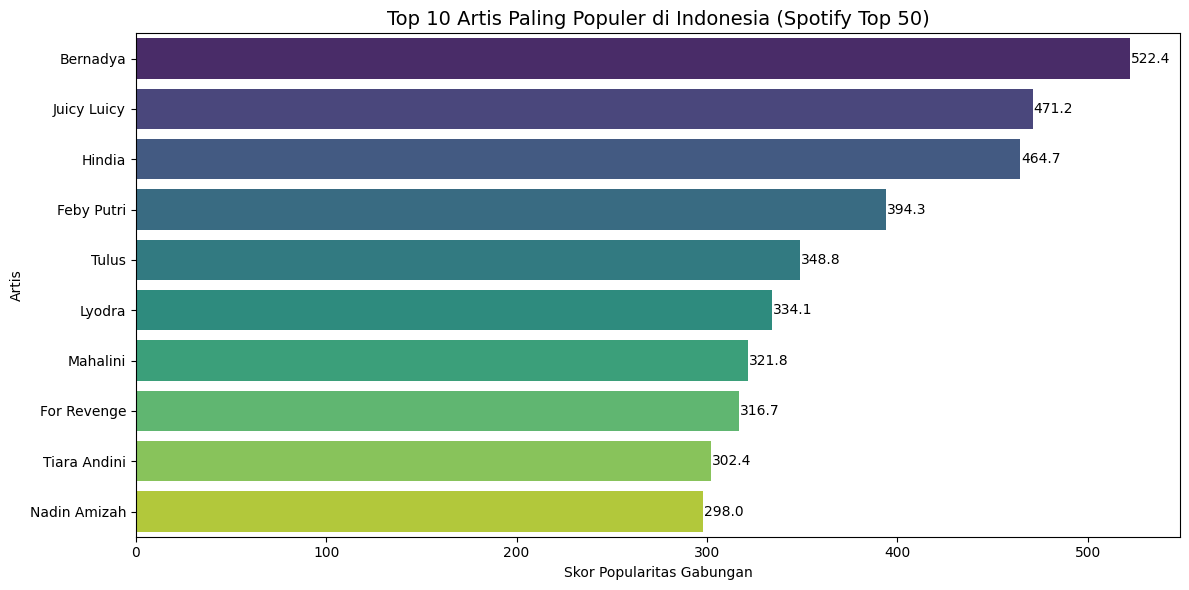

In [443]:
# 1. Filter data Indonesia dan copy
df_id = df_filtered[df_filtered['country'] == 'ID'].copy()

# 2. Bersihkan kolom 'artists' dan pisahkan jadi list
df_id.loc[:, 'artists'] = df_id['artists'].str.strip("[]").str.replace("'", "", regex=False).str.split(", ")

# 3. Ubah jadi satu artis per baris
df_exploded = df_id.explode('artists')

# 4. Hitung rata-rata popularitas dan jumlah lagu
artist_group = df_exploded.groupby('artists').agg({
    'popularity': 'mean',
    'name': 'count'
}).rename(columns={
    'popularity': 'avg_popularity',
    'name': 'song_count'
})

# 5. Hitung skor gabungan
artist_group['final_score'] = artist_group['avg_popularity'] * 0.7 + artist_group['song_count'] * 0.3

# 6. Ambil 10 artis teratas
top_10_artists = artist_group.sort_values('final_score', ascending=False).head(10).reset_index()
# Tampilkan hasilnya
print(top_10_artists)
print()

# 7. Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_10_artists,
    x='final_score',
    y='artists',
    hue='artists',
    palette='viridis',
    dodge=False,
    legend=False
)

# Tambah label nilai di ujung bar
for i, row in top_10_artists.iterrows():
    plt.text(row['final_score'] + 0.5, i, f"{row['final_score']:.1f}", va='center')

# Judul dan label
plt.title('Top 10 Artis Paling Populer di Indonesia (Spotify Top 50)', fontsize=14)
plt.xlabel('Skor Popularitas Gabungan')
plt.ylabel('Artis')
plt.tight_layout()
plt.show()

**Insight:**
* Bernadya jadi artis paling populer di Spotify Indonesia (skor: 521.5) berkat kombinasi popularitas tinggi dan jumlah lagu terbanyak (1556 lagu).
* Juicy Luicy dan Hindia menyusul di posisi 2 dan 3, menunjukkan konsistensi rilisan dan basis pendengar yang kuat.
* Lyodra dan Feby Putri punya popularitas rata-rata tertinggi (79.17 & 78.51) meski jumlah lagu lebih sedikit. Menandakan kualitas lagu yang tinggi.
* Tulus tetap masuk top 5 meskipun produktivitasnya lebih rendah dari yang lain. Menunjukkan lagu-lagunya tahan lama dan terus diputar.

### 2. Mengetahui faktor apa saja yang memengaruhi popularitas lagu

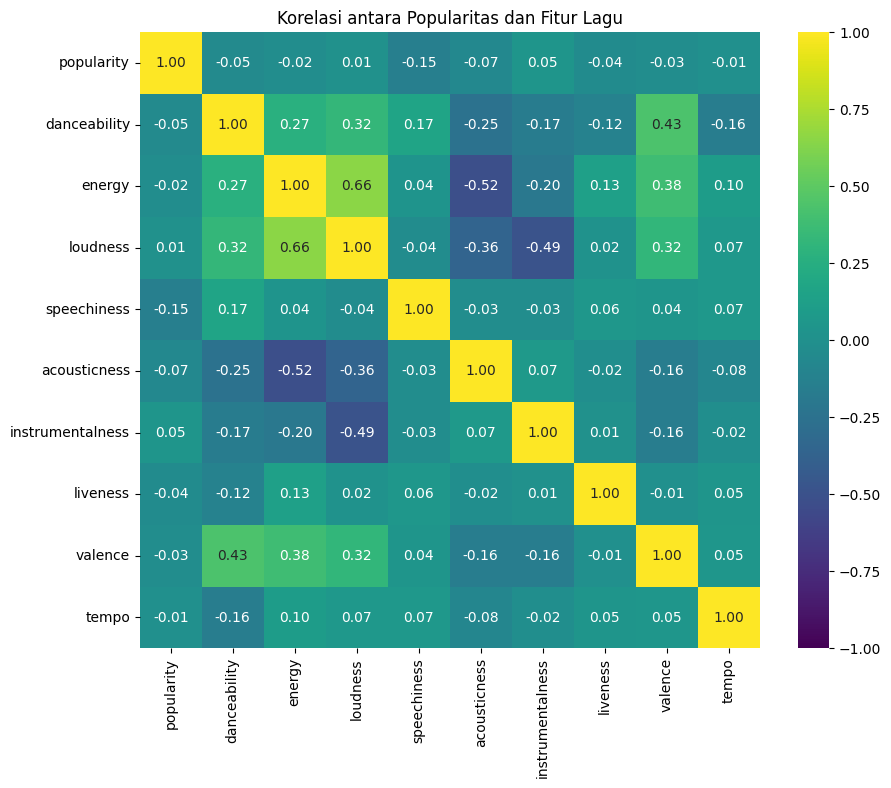

In [444]:
# Pilih fitur yang relevan, tambah beberapa fitur audio lain
fitur_terpilih = [
    'popularity', 'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo'
]

# Hitung korelasi antar fitur
korelasi_fitur = df_filtered[fitur_terpilih].corr()

# Visualisasi Korelasi dengan Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(korelasi_fitur, annot=True, cmap='viridis', fmt=".2f", vmin=-1, vmax=1)
plt.title("Korelasi antara Popularitas dan Fitur Lagu")
plt.show()

**Insight:**
1. Fitur yang Paling Positif Berkorelasi dengan Popularitas:

   * Valence (0.43): Artinya lagu yang terdengar lebih positif atau ceria cenderung lebih populer
   * Energy (0.38): Artinya lagu dengan energi tinggi seperti beat cepat dan suara yang kuat cenderung menarik lebih banyak pendengar.
   * Danceability (0.43): Artinya lagu yang mudah untuk berdansa juga berhubungan positif dengan popularitas.

2. Fitur yang Berkorelasi Negatif dengan Popularitas:

   * Speechiness (-0.15): Artinya lagu yang terlalu mirip dengan pidato atau spoken-word (misalnya banyak narasi atau rap kering) cenderung kurang populer
   * Acousticness (-0.07): Artinya lagu yang sangat akustik (tanpa banyak instrumen elektronik) sedikit kurang populer.
   * Tempo (-0.01): Artinya tempo tidak terlalu berpengaruh terhadap popularitas lagu.

3. Fitur Lain yang Kurang Berpengaruh:

   * Liveness, Instrumentalness, Loudness, dan Tempo memiliki korelasi sangat rendah terhadap popularitas, menunjukkan bahwa faktor-faktor ini tidak terlalu menentukan tingkat popularitas sebuah lagu dalam dataset ini.



**Kesimpulan:**

Fitur-fitur seperti **valence**, **danceability**, dan **energy** memiliki kontribusi paling besar terhadap popularitas lagu. Artinya, lagu yang upbeat, enerjik, dan ceria lebih cenderung disukai oleh pendengar global. Sebaliknya, lagu yang terlalu akustik atau banyak mengandung narasi tidak terlalu populer.



### 3. Mengetahui cara membuat sistem rekomendasi terbaik yang dapat diimplementasikan.

In [445]:
def run_recommendation():
    song_name = input("Masukkan nama lagu yang kamu suka: ")

    if song_name not in cosine_sim_df.index:
        print(f"Lagu '{song_name}' tidak ditemukan di database.")
        return

    rekomendasi = recommend_by_identifier(song_name, top_n=10)
    print(f"\nRekomendasi lagu mirip dengan '{song_name}':")
    for i, (song, score) in enumerate(rekomendasi.items(), 1):
        print(f"{i}. {song} (similarity: {score:.3f})")

# Contoh pemanggilan
run_recommendation()

Masukkan nama lagu yang kamu suka: Bernadya - Satu Bulan

Rekomendasi lagu mirip dengan 'Bernadya - Satu Bulan':
1. Ariana Grande - intro (end of the world) (similarity: 1.000)
2. Yovie Widianto, Lyodra - Terlalu Cinta (similarity: 0.998)
3. NIKI - Take A Chance With Me (similarity: 1.000)
4. Billie Eilish - WILDFLOWER (similarity: 0.999)
5. Bruno Mars - It Will Rain (similarity: 0.997)
6. Tiara Andini - Usai (similarity: 0.999)
7. Miley Cyrus - Angels Like You (similarity: 0.996)
8. Nadin Amizah - Semua Aku Dirayakan (similarity: 1.000)
9. Batas Senja - Nanti Kita Seperti Ini (similarity: 0.999)
10. Tulus - Monokrom (similarity: 1.000)


# Referensi

1. Celma, Ò., & Herrera, P. (2008, October). A new approach to evaluating novel recommendations. In Proceedings of the 2008 ACM conference on Recommender systems (pp. 179-186).
2. Schedl, M., Knees, P., & Gouyon, F. (2017, August). New paths in music recommender systems research. In Proceedings of the Eleventh ACM Conference on Recommender Systems (pp. 392-393).